In [ ]:
import pickle
import tensorflow as tf
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
import librosa.display # for visualization 
import IPython.display as ipd # to play audio file
from scipy.io.wavfile import write # to write audio files to directory
import scipy 
import os
ms.use('seaborn-muted')
%matplotlib inline

#### To open the data

In [5]:
#To open data
with open('raw_data.pkl', 'rb') as raw_data:
    audio_data = pickle.load(raw_data)

#### Explore the data

In [58]:
# Normalize audio data

In [57]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+1e-6)
    return data-0.5

In [59]:
audio_norm(audio_data[0])

array([[ 1.3169366e-01,  1.5719748e-01,  1.8566936e-01, ...,
         5.1109195e-02, -3.3739775e-02,  2.5453627e-02],
       [-6.4080060e-03, -3.6019683e-03, -3.7092090e-02, ...,
        -2.3244309e-01, -2.2097290e-01, -2.0796448e-01],
       [-6.7761540e-04, -4.9912333e-03, -4.8790872e-03, ...,
        -3.0462426e-01, -3.0491796e-01, -2.8369725e-01],
       ...,
       [ 6.4240694e-03,  4.2531490e-03,  6.2699318e-03, ...,
         3.4007251e-02,  4.9348116e-02,  4.4032216e-02],
       [ 1.1579937e-01,  9.6292377e-02,  1.1315876e-01, ...,
        -4.9770474e-03, -8.7555647e-03, -5.4901242e-03],
       [ 1.7624497e-03,  1.2862682e-04, -4.2387843e-04, ...,
        -1.9845158e-02,  3.0014277e-02, -2.8146714e-02]], dtype=float32)

In [60]:
len(audio_data[0])

9600

In [61]:
labels = np.unique(audio_data[1], return_counts= True)
len(labels[0])

600

In [14]:
# we have 600 unique IDs
#Each unique ID has 16 audio instances
#That leaves us with 9600 total instances

#### Creating a folder in the working directory to store the audio files

In [115]:
cwd = os.getcwd()
new_folder = "audio_dataset_2"
folder = os.path.join(cwd, new_folder) # folder has the entire path to the created folder
os.makedirs(folder)

In [116]:
# Saving first 25 audio files
for i in range(24):
    scipy.io.wavfile.write(str(folder)+"\\audio_"+str(i+1)+".wav", 10000, audio_data[0][i])
    

In [117]:
labels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]

In [68]:
audio_path_1 = str(folder)+"\\audio_10.wav"
ipd.Audio(audio_path_1)

#### Try to extract features

The human voice normally spans a frequency range from about 100Hz to 8kHz.The lowest
frequency of any voice signal is called the Fundamental Frequency. The average fundamental
frequency for a male voice is 125Hz, and for a female voice it is 200Hz. When speaking, consonants
take up space between 2kHz and 5kHz. These sounds pass quickly and can help make speech more
intelligible. Similarly, vowel sounds are most prominent between 500Hz and 2kHz.

The human voice normally spans a frequency range from about
- 100Hz to 8000Hz

The average fundamental frequency(lowest
frequency of any voice signal) for 
- a male voice is 125Hz
- a female voice it is 200Hz

When speaking, 
consonants (These sounds pass quickly and can help make speech more
intelligible)
- 2000Hz and 5000Hz

vowel sounds
- 500Hz and 2000Hz

#### Plotting Time-domain graph

In [19]:
#we have the plot the amplitude envelope of a waveform.
# time-domain representation of a given signal
#loudness (amplitude) of sound wave changing with time. Here amplitude = 0 represents silence
#These amplitudes are not very informative, as they only talk about the loudness of audio recording

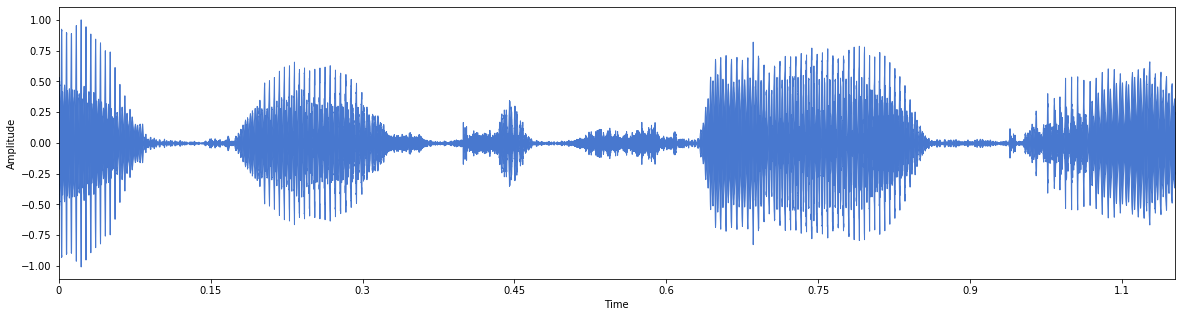

In [67]:
#Taking one sample audio from the saved folder
audio_path_9 = str(folder)+"\\audio_10.wav"
y , sr = librosa.load(audio_path_9)
# y - sample amplitude and sr- sampling rate
plt.figure(figsize=(20, 5))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
librosa.display.waveplot(y, sr=sr)

To better understand the audio signal, it is necessary to transform it into the frequency-domain. 
The frequency-domain representation of a signal tells us what different 
frequencies are present in the signal. 

- Fourier Transform is a mathematical  concept that can convert a continuous signal from time-domain to frequency-domain

- https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520


- Inverse Fourier Transform :  is just the opposite of the Fourier Transform. It takes the frequency-domain representation of a given signal as input and does mathematically synthesize the original signal.

- Fast Fourier Transform: FT considers a continuous signal while FFT takes a discrete signal as input

- We have a sequence of amplitudes that were sampled from a continuous audio signal. DFT or FFT algorithm can convert this time-domain discrete signal into a frequency-domain.

#### Plotting the Frequency graph

In [21]:
#wrtie a function to plot Fast Fourier Transform of the singal

In [73]:
def FFT_plot (audio, sampling_rate):
    n = len(audio)
    T = 1/ sampling_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0, 1.0 / (2.0 * T) , n / 2)
    plt.rcParams["figure.figsize"] = [16,9]
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0 / n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency -->")
    plt.ylabel("Magnitude")
    return plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


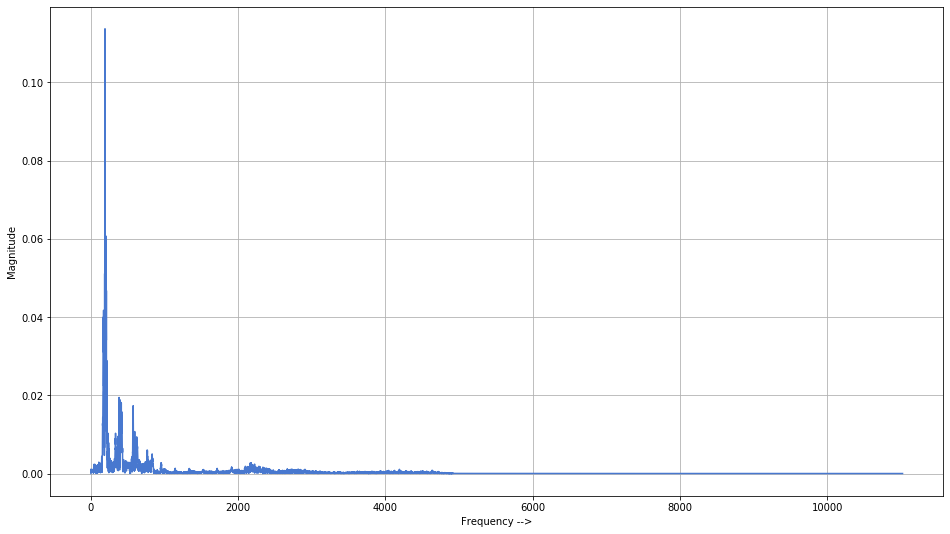

In [74]:
FFT_plot(y,sr)

#### We got frequencies But where is the Time information?

### Spectogram

- Visual representation of frequencies of a given signal with time is called Spectrogram

- when we applied FFT to our signal, it gave us only frequency values and we lost the track of time information.
- Now our system won’t be able to tell what was spoken first if we use these frequencies as features
- We need to find a different way to calculate features for our system such that it has frequency values along with the time at which they were observed. Here Spectrograms come into the picture

### How to create spectogram
- Idea is to break the audio signal into smaller frames(windows) and calculate DFT (or FFT) for each window.

1025


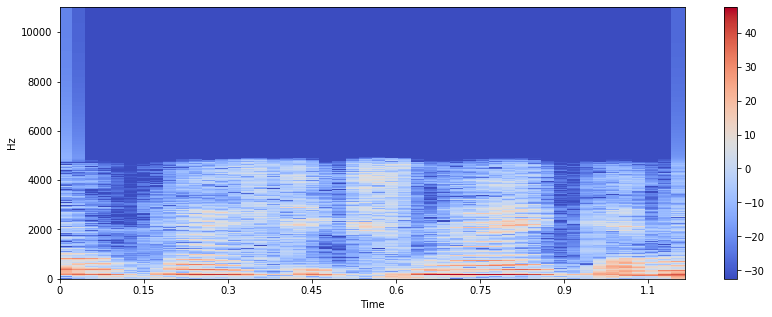

In [93]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
print(len(Xdb))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
#Pass Xdb as frequecny to model

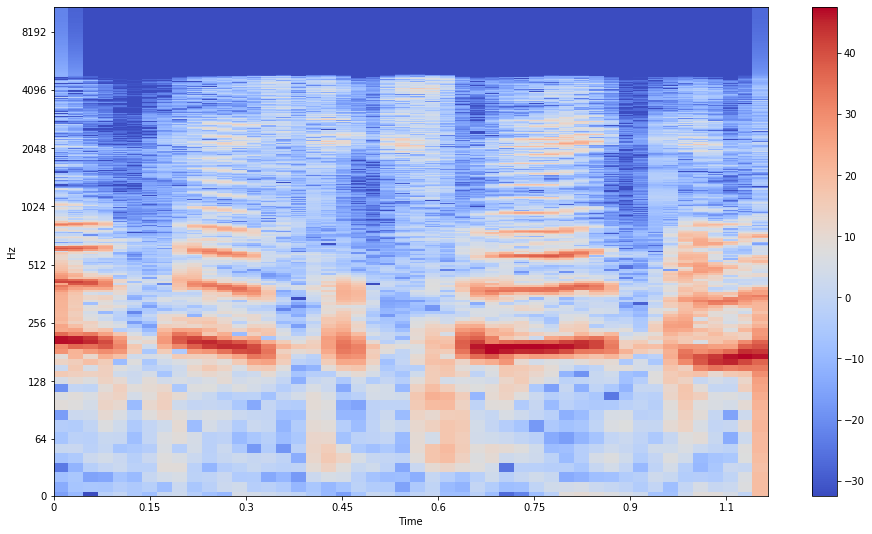

In [78]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Extract Frequency and time

In [95]:
# Frequency
n = Xdb.shape[0]
yout = librosa.fft_frequencies(sr=sr, n_fft=1+(2 * (n - 1)) )
#yout fives the frequencies of the sample audio
print(yout)
print(type(yout))
print("Shape of audio:",yout.shape)

print("Max freq:", yout.max())
print("Min freq:", yout.min())

[0.00000000e+00 1.07666016e+01 2.15332031e+01 ... 1.10034668e+04
 1.10142334e+04 1.10250000e+04]
<class 'numpy.ndarray'>
Shape of audio: (1025,)
Max freq: 11025.0
Min freq: 0.0


In [113]:
#time
m = Xdb.shape[0]
hop_length=500
xout = librosa.frames_to_time(np.arange(m), sr=sr, hop_length=hop_length)

#xout gives time interval of the audio
xout

array([0.00000000e+00, 2.26757370e-02, 4.53514739e-02, ...,
       2.31746032e+01, 2.31972789e+01, 2.32199546e+01])

#### MFCC

(20, 48)


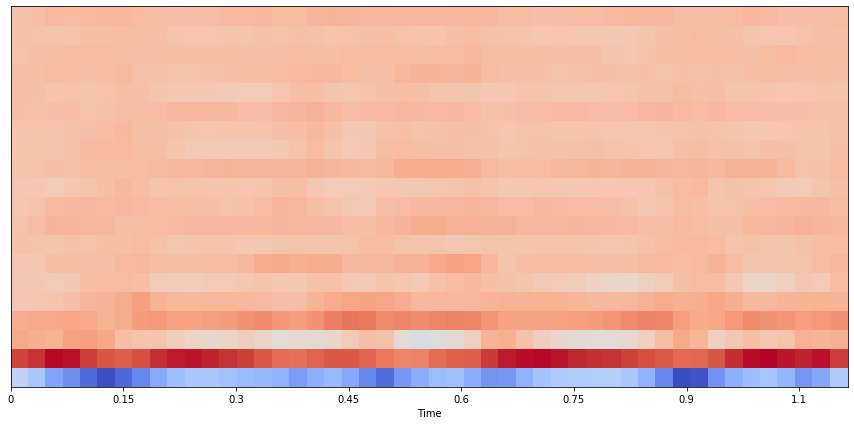

In [81]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [83]:
print(type(mfccs))

<class 'numpy.ndarray'>


#### Write loop to extract frequency and time

In [142]:
def Extract_Freq_Time(y,sr): #y- audio signal, sr- sample rate
   # print(audio_path)
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    #to see spectogram plot un-comment the below lines
    #plt.figure(figsize=(14, 5))
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #plt.colorbar()
    # get requency
    n = Xdb.shape[0]
    yout = librosa.fft_frequencies(sr=sr, n_fft=1+(2 * (n - 1)) )
    #get time
    m = Xdb.shape[0]
    hop_length=500
    xout = librosa.frames_to_time(np.arange(m), sr=sr, hop_length=hop_length)
    return yout, xout

In [144]:
frequency_list = []
time_list = []
for filename in os.listdir(folder):
    #Taking one sample audio from the saved folder
    audio_path = str(folder)+"\\"+ filename
    y , sr = librosa.load(audio_path)
    fr, time = Extract_Freq_Time(y, sr)
    frequency_list.append(fr)
    time_list.append(time)